Part One

• DOMAIN: Digital content and entertainment industry

• CONTEXT: The objective of this project is to build a text classification model that
analyses the customer's sentiments based on their reviews in the IMDB database. The
model uses a complex deep learning model to build an embedding layer followed by
a classification algorithm to analyse the sentiment of the customers.

• DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by
sentiment (positive/negative). Reviews have been preprocessed, and each review is
encoded as a sequence of word indexes (integers). For convenience, the words are
indexed by their frequency in the dataset, meaning the for that has index 1 is the
most frequent word. Use the first 20 words from each review to speed up training,
using a max vocabulary size of 10,000. As a convention, "0" does not stand for a
specific word, but instead is used to encode any unknown word.

• PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text
parameters to determine the customer sentiments.

Steps and tasks: [ Total Score: 30 points]

1. Import and analyse the data set.
Hint: - Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

2. Perform relevant sequence adding on the data

3. Perform following data analysis:
• Print shape of features and labels
• Print value of any one feature and it's label

4. Decode the feature value to get original sentence

5. Design, train, tune and test a sequential model.

Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN
classifiers. Be analytical and experimental here in trying new approaches to design the best model.

6. Use the designed model to print the prediction on any one sample.

Loading the dataset

In [3]:
from keras.datasets import imdb


In [4]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

Train test split

In [5]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
print (x_train[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    1
  194 1153  194 8255   78  228    5    6 1463 4369 5012  134   26    4
  715    8  118 1634   14  394   20   13  119  954  189  102    5  207
  110 3103   21   14   69  188    8   30   23    7    4  249  126   93
    4  114    9 2300 1523    5  647    4  116    9   35 8163    4  229
    9  340 1322    4  118    9    4  130 4901   19    4 1002    5   89
   29  952   46   37    4  455    9   45   43   38 1543 1905  398    4
 1649 

In [7]:
print (x_train[1].shape)

(300,)


In [8]:
print(y_train[1])

0


In [9]:
import numpy as np

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [12500 12500]]


In [10]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [12500 12500]]


WORD INDEX 





In [11]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [12]:

reverse_word_map = dict(map(reversed, word_index.items()))

In [13]:
# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

In [14]:
#test
review = sequence_to_text(x_train[0])
print(review)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of'

Sequential Model using Keras 

The keras embedding layer doesn't require onehot encode 

In [15]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM
### create the model
model = Sequential()
model.add(Embedding(vocab_size, 128, trainable=True, input_length=maxlen))
model.add(LSTM(units=64, dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
### Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=500, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,331,521
Trainable params: 1,331,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
50/50 [==============================] - 24s 126ms/step - loss: 0.6811 - accuracy: 0.5817 - val_loss: 0.5534 - val_accuracy: 0.7734
Epoch 2/10
50/50 [==============================] - 5s 108ms/step - loss: 0.4278 - accuracy: 0.8304 -

 Model Accuracy


In [16]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 84.95%


In [17]:
y_pred = model.predict(x_test)

In [18]:
print(y_pred)

[[0.07116668]
 [0.99933964]
 [0.69103634]
 ...
 [0.00517607]
 [0.01176149]
 [0.2646355 ]]


In [19]:
y_pred = np.round(y_pred, 0)

In [20]:

y_pred.shape

(25000, 1)

In [21]:
y_pred = y_pred.astype('int64')

In [22]:

y_test

array([0, 1, 1, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import classification_report
target_names = ['Sentiment_Positive', 'Sentiment_Negative']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

Sentiment_Positive       0.83      0.87      0.85     12500
Sentiment_Negative       0.87      0.83      0.85     12500

          accuracy                           0.85     25000
         macro avg       0.85      0.85      0.85     25000
      weighted avg       0.85      0.85      0.85     25000



In [24]:
sequence_to_text(x_test[0])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [25]:
sequence_to_text(x_test[1])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'the',
 'as',
 'you',
 "world's",
 'is',
 'quite',
 'br',
 'mankind',
 'most',
 'that',
 'quest',
 'are',
 'chase',
 'to',
 'being',
 'quickly',
 'of',
 'little',
 'it',
 'time',
 'hell',
 'to',
 'plot',
 'br',
 'of',
 'something',
 'long',
 'put',
 'are',
 'of',
 'every',
 'place',
 'this',
 'consequence',
 'and',
 'of',
 'interplay',
 'storytelling',
 'being',
 'nasty',
 'not',
 'of',
 'you',
 'warren',
 'in',
 'is',
 'failed',
 'club',
 'i',
 'i',
 'of',
 'films',
 'pay',
 'so',
 'sequences',
 'and',
 'film',
 'okay',
 'uses',
 'to',
 'received',
 'and',
 'if',
 'time',
 'done',
 'for',
 'room',
 'sugar',
 'viewer',
 'as',
 'cartoon',
 'of',
 'gives',
 'to',
 'forgettable',
 'br',
 'be',
 'because',
 'many'

## Retrive the output of each layer in keras for a given single test sample from the trained model you built

 Retrieve the output of each layer in Keras for a given single test sample from the trained model built 

In [ ]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
print (outputs)
functors = [K.function([inp], [K.learning_phase()], [out]) for out in outputs]  


Part Two

• DOMAIN: Social media analytics


• CONTEXT: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected
using hashtag based supervision but such datasets are noisy in terms of labels and
language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in
these requires the availability of contextual tweets.In this hands-on project, the goal is to
build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

• DATA DESCRIPTION:
The dataset is collected from two news websites, theonion.com and huffingtonpost.com.
This new dataset has the following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and
informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with
much less noise as compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in
teasing apart the real sarcastic elements

Content: Each record consists of three attributes:

is_sarcastic: 1 if the record is sarcastic otherwise 0

headline: the headline of the news article

article_link: link to the original news article. Useful in collecting supplementary data

Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

• PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text parameters
to determine the customer sentiments.

Steps and tasks: [ Total Score: 30 points]
1. Read and explore the data
2. Retain relevant columns
3. Get length of each sentence
4. Define parameters
5. Get indices for words
6. Create features and labels
7. Get vocabulary size
8. Create a weight matrix using GloVe embeddings
9. Define and compile a Bidirectional LSTM model.
Hint: Be analytical and experimental here in trying new approaches to design the best model.
10. Fit the model and check the validation accuracy



In [26]:
import tensorflow as tf
import pandas as pd
import string
import re
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import nltk
import spacy
import sys
from spacy.lang.en import English
import en_core_web_sm
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

print(tf.__version__) 

2.4.1


In [29]:
df = pd.read_json("/content/drive/MyDrive/GreatLearning/NLP_Projects/NLP-6/Sarcasm_Headlines_Dataset.json", lines=True)
df = df[['headline', 'is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [30]:
# check for columns with null values
df.is_sarcastic.isnull().any() # no missing values in is_sarcastic column
df.headline.isnull().any() # no missing values in headline column

False

In [31]:
df['headline'] = df.headline.apply(lambda x:x.lower())  # convert all words in headline into lower case 
df['headline'] = df.headline.apply(lambda x: ' '.join(word.strip(string.punctuation) for word in x.split()))  # remove all punctuations in headline

In [32]:
df['headline_count'] = df.headline.apply(lambda x: len(list(x.split())))
df['headline_unique_word_count'] = df.headline.apply(lambda x: len(set(x.split())))
df['headline_has_digits'] = df.headline.apply(lambda x: bool(re.search(r'\d', x)))
df

,headline,is_sarcastic,headline_count,headline_unique_word_count,headline_has_digits
0,former versace store clerk sues over secret bl...,0,12,12,False
1,the roseanne revival catches up to our thorny ...,0,14,14,False
2,mom starting to fear son's web series closest ...,1,14,13,False
3,boehner just wants wife to listen not come up ...,1,13,13,False
4,j.k rowling wishes snape happy birthday in the...,0,11,11,False
...,...,...,...,...,...
26704,american politics in moral free-fall,0,5,5,False
26705,america's best 20 hikes,0,4,4,True
26706,reparations and obama,0,3,3,False
26707,israeli ban targeting boycott supporters raise...,0,8,8,False


In [35]:
sarcastic_dat = df.groupby('is_sarcastic').count()
sarcastic_dat.index = ['Non-sarcastic','Sarcastic']

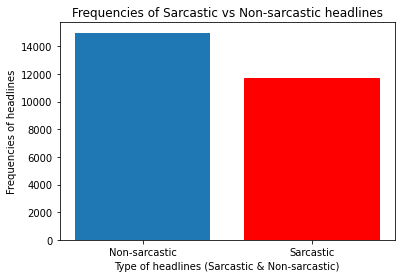

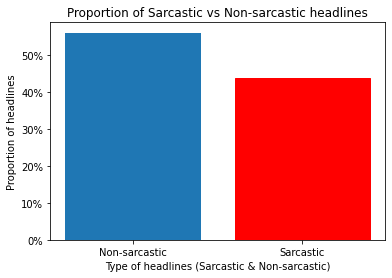

In [36]:
plt.xlabel('Type of headlines (Sarcastic & Non-sarcastic)')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of Sarcastic vs Non-sarcastic headlines')
bar_graph = plt.bar(sarcastic_dat.index, sarcastic_dat.headline_count)
bar_graph[1].set_color('r')
plt.show()


plt.xlabel('Type of headlines (Sarcastic & Non-sarcastic)')
plt.ylabel('Proportion of headlines')
plt.xticks(fontsize=10)
plt.title('Proportion of Sarcastic vs Non-sarcastic headlines')
bar_graph = plt.bar(sarcastic_dat.index, sarcastic_dat.headline_count / sarcastic_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()



In [37]:

round(sarcastic_dat.headline_count / sarcastic_dat.headline_count.sum(), 2)

Non-sarcastic    0.56
Sarcastic        0.44
Name: headline_count, dtype: float64

In [ ]:
# This is not an imbalanced class dataset
# Non-sarcastic    0.56
# Sarcastic        0.44

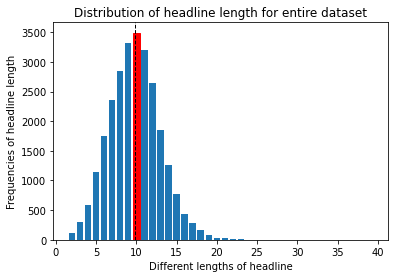

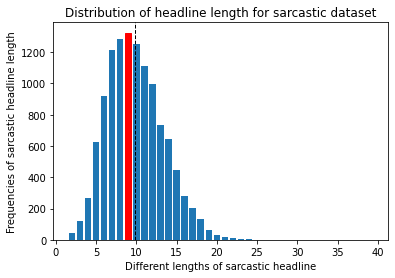

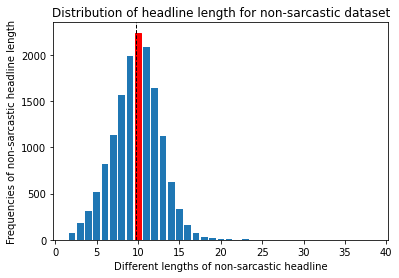

In [38]:
all_dat = df.groupby('headline_count').count()
sarcastic_dat1 = df[df.is_sarcastic==1]
sarcastic_dat = sarcastic_dat1.groupby('headline_count').count()
not_sarcastic_dat1 = df[df.is_sarcastic==0]
not_sarcastic_dat = not_sarcastic_dat1.groupby('headline_count').count()

plt.xlabel('Different lengths of headline')
plt.ylabel('Frequencies of headline length')
plt.xticks(fontsize=10)
plt.title('Distribution of headline length for entire dataset')
bar_graph = plt.bar(all_dat.index, all_dat.headline)
bar_graph[8].set_color('r')
plt.axvline(df.headline_count.mean(), color='k', linestyle='dashed', linewidth=1)  # median is 10 words in a headline
plt.show()

plt.xlabel('Different lengths of sarcastic headline')
plt.ylabel('Frequencies of sarcastic headline length')
plt.xticks(fontsize=10)
plt.title('Distribution of headline length for sarcastic dataset')
bar_graph = plt.bar(sarcastic_dat.index, sarcastic_dat.headline)
bar_graph[7].set_color('r')
plt.axvline(sarcastic_dat1.headline_count.mean(), color='k', linestyle='dashed', linewidth=1)  # median is 10 words in a headline
plt.show()


plt.xlabel('Different lengths of non-sarcastic headline')
plt.ylabel('Frequencies of non-sarcastic headline length')
plt.xticks(fontsize=10)
plt.title('Distribution of headline length for non-sarcastic dataset')
bar_graph = plt.bar(not_sarcastic_dat.index, not_sarcastic_dat.headline)
bar_graph[8].set_color('r')
plt.axvline(not_sarcastic_dat1.headline_count.mean(), color='k', linestyle='dashed', linewidth=1)  # median is 10 words in a headline
plt.show()



In [ ]:
# difference in the length of sarcastic and non-sarcastic headlines is not significant. 
# median and mean length of headlines is around 10 words

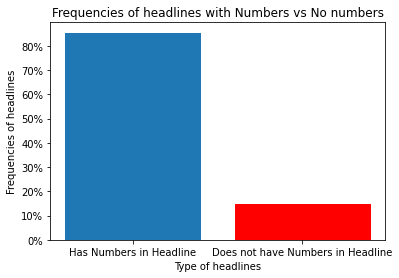

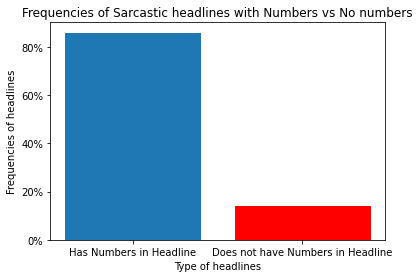

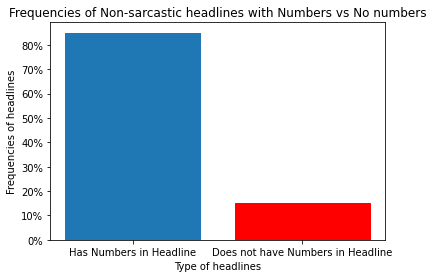

Has Numbers in Headline              0.85
Does not have Numbers in Headline    0.15
Name: headline, dtype: float64
Has Numbers in Headline              0.86
Does not have Numbers in Headline    0.14
Name: headline, dtype: float64
Has Numbers in Headline              0.85
Does not have Numbers in Headline    0.15
Name: headline, dtype: float64


In [39]:
digits_dat = df.groupby('headline_has_digits').count()
digits_dat.index = ['Has Numbers in Headline','Does not have Numbers in Headline']


plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of headlines with Numbers vs No numbers')
bar_graph = plt.bar(digits_dat.index, digits_dat.headline / digits_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


sarcastic_digits_dat = df[df.is_sarcastic==1].groupby('headline_has_digits').count()
sarcastic_digits_dat.index = ['Has Numbers in Headline','Does not have Numbers in Headline']


plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of Sarcastic headlines with Numbers vs No numbers')
bar_graph = plt.bar(sarcastic_digits_dat.index, sarcastic_digits_dat.headline / sarcastic_digits_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


not_sarcastic_digits_dat = df[df.is_sarcastic==0].groupby('headline_has_digits').count()
not_sarcastic_digits_dat.index = ['Has Numbers in Headline','Does not have Numbers in Headline']


plt.xlabel('Type of headlines')
plt.ylabel('Frequencies of headlines')
plt.xticks(fontsize=10)
plt.title('Frequencies of Non-sarcastic headlines with Numbers vs No numbers')
bar_graph = plt.bar(not_sarcastic_digits_dat.index, not_sarcastic_digits_dat.headline / not_sarcastic_digits_dat.headline_count.sum())
bar_graph[1].set_color('r')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

print(round(digits_dat.headline / digits_dat.headline_count.sum(),2))
print(round(sarcastic_digits_dat.headline / sarcastic_digits_dat.headline_count.sum(),2))
print(round(not_sarcastic_digits_dat.headline / not_sarcastic_digits_dat.headline_count.sum(),2))



In [ ]:
# difference in the use of numbers/statistics in sarcastic and non-sarcastic headlines is not significant. 
# ~85% headlines uses numbers

In [40]:
import nltk
nltk.download('all')
nlp = en_core_web_sm.load()
parser = English()
en_stop = set(nltk.corpus.stopwords.words('english'))


def tokenize(text):
    """this function is to tokenize the headline into a list of individual words"""
    lda_tokens = []
    tokens = parser(text)  # need to use parser for python to treat the list as words
    for token in tokens:
        if token.orth_.isspace():  # to ignore any whitespaces in the headline, so that token list does not contain whitespaces 
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)   # tokens (headlines) are already in lowercase
    return lda_tokens


def get_lemma(word):
    """this function is to lemmatize the words in a headline into its root form"""
    lemma = wn.morphy(word)  # converts the word into root form from wordnet
    if lemma is None:
        return word
    else:
        return lemma
    

def prepare_text_for_lda(text):
    tokens = tokenize(text)  # parse and tokenize the headline into a list of words
    tokens = [token for token in tokens if len(token) > 4]  # remove headlines with only length of 4 words or less
    tokens = [token for token in tokens if token not in en_stop]  # remove stopwords in the headline
    tokens = [get_lemma(token) for token in tokens]  # lemmatize the words in the headline
    return tokens

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [41]:

text_data = []
for headline in df.headline:
    tokens = prepare_text_for_lda(headline)
    text_data.append(tokens)

In [42]:
from gensim import corpora
import pickle

dictionary = corpora.Dictionary(text_data)  # Convert all headlines into a corpus of words, with each word as a token
corpus = [dictionary.doc2bow(text) for text in text_data]  # Convert each headline (a list of words) into the bag-of-words format. (Word ID, Count of word)
pickle.dump(corpus, open('corpus.pkl', 'wb'))  
dictionary.save('dictionary.gensim')  # takes a while to run the dictionary and corpus

In [43]:
import gensim

NUM_TOPICS = [3, 5, 10]
# passes: Number of passes through the corpus during training
# alpha: priori on the distribution of the topics in each document.
# The higher the alpha, the higher the likelihood that document contains a wide range of topics, vice versa. 
# beta: priori on the distribution of the words in each topic.
# The higher the beta, the higher the likelihood that topic contains a wide range of words, vice versa.
# we do not alter / fine tune the default values of alpha and beta
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS[1], id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=5)
topics

[(0,
  '0.011*"clinton" + 0.008*"watch" + 0.007*"court" + 0.006*"hillary" + 0.005*"supreme"'),
 (1,
  '0.010*"report" + 0.008*"child" + 0.007*"study" + 0.007*"woman" + 0.006*"find"'),
 (2,
  '0.010*"change" + 0.010*"woman" + 0.009*"school" + 0.006*"student" + 0.005*"obama"'),
 (3,
  '0.048*"trump" + 0.014*"donald" + 0.011*"house" + 0.009*"white" + 0.006*"election"'),
 (4,
  '0.006*"parent" + 0.006*"office" + 0.005*"american" + 0.005*"shooting" + 0.005*"introduce"')]

In [44]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=5)
topics

[(0,
  '0.016*"woman" + 0.007*"school" + 0.006*"child" + 0.005*"years" + 0.005*"people"'),
 (1,
  '0.007*"clinton" + 0.004*"family" + 0.004*"report" + 0.004*"hillary" + 0.004*"watch"'),
 (2,
  '0.029*"trump" + 0.009*"donald" + 0.007*"obama" + 0.007*"house" + 0.007*"american"')]

In [45]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=5)
topics

[(0,
  '0.013*"first" + 0.008*"learn" + 0.008*"great" + 0.006*"dream" + 0.006*"check"'),
 (1,
  '0.011*"obama" + 0.008*"local" + 0.007*"award" + 0.007*"reason" + 0.007*"relationship"'),
 (2,
  '0.012*"think" + 0.008*"world" + 0.008*"nation" + 0.008*"money" + 0.008*"woman"'),
 (3,
  '0.024*"house" + 0.020*"white" + 0.019*"trump" + 0.015*"woman" + 0.010*"election"'),
 (4,
  '0.082*"trump" + 0.029*"donald" + 0.009*"party" + 0.008*"fight" + 0.008*"reveal"'),
 (5,
  '0.010*"want" + 0.009*"better" + 0.007*"cover" + 0.006*"around" + 0.006*"coming"'),
 (6,
  '0.012*"police" + 0.010*"shooting" + 0.010*"release" + 0.009*"photo" + 0.009*"woman"'),
 (7,
  '0.030*"report" + 0.021*"school" + 0.019*"clinton" + 0.015*"parent" + 0.011*"child"'),
 (8,
  '0.014*"study" + 0.012*"court" + 0.012*"find" + 0.010*"report" + 0.008*"supreme"'),
 (9,
  '0.014*"things" + 0.014*"health" + 0.012*"break" + 0.008*"country" + 0.008*"north"')]

In [46]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')


In [47]:
#!pip install pyLDAvis
!pip install gensim
!pip install pyLDAvis==2.1.2
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim


     |████████████████████████████████| 1.6MB 12.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=500acd80b686ddf51155f56a9f89166cddc3f8c5f35f102705cd8852e8117eb2
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [48]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [49]:
lda3 = gensim.models.ldamodel.LdaModel.load('model3.gensim')
lda_display3 = pyLDAvis.gensim.prepare(lda3, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display3)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [50]:
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [51]:
from numpy import mean

sarcastic = list(df.is_sarcastic == 1)
tuple_list = []
for headline in sarcastic:
    sarcastic = lda10[corpus[headline]]
    for tuple_ in sarcastic:
        tuple_list.append(tuple_)

print('For LDA model with 10 clusters:')
print('\nFor Sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

not_sarcastic = list(df.is_sarcastic == 0)
tuple_list = []
for headline in not_sarcastic:
    not_sarcastic = lda10[corpus[headline]]
    for tuple_ in not_sarcastic:
        tuple_list.append(tuple_)
        

print('\nFor Non-sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

# LDA model with 10 clusters not differentiable between sarcastic and not sarcastic headlines.
# Not very interpretable

For LDA model with 10 clusters:

For Sarcastic Dataset:
[(0, 0.011721045), (1, 0.011720769), (2, 0.36339065), (3, 0.06659028), (4, 0.011721035), (5, 0.121460654), (6, 0.01172097), (7, 0.32336318), (8, 0.06659048), (9, 0.011720963)]

For Non-sarcastic Dataset:
[(0, 0.011890559), (1, 0.011890345), (2, 0.36863625), (3, 0.08202157), (4, 0.011890553), (5, 0.15215407), (6, 0.011890501), (7, 0.25571388), (8, 0.08202186), (9, 0.011890496)]


In [52]:
tuple_list = []
for headline in sarcastic:
  print (headline)
  print (corpus[headline[0]])
  sarcastic = lda[corpus[headline[0]]]
  for tuple_ in sarcastic:
    tuple_list.append(tuple_)

print('For LDA model with 5 clusters:')
print('For Sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

not_sarcastic = list(df.is_sarcastic == 0)
tuple_list = []
for headline in not_sarcastic:
    not_sarcastic = lda[corpus[headline]]
    for tuple_ in not_sarcastic:
        tuple_list.append(tuple_)
        

print('\nFor Non-sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])



(0, 0.011111604)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
(1, 0.011111112)
[(8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]
(2, 0.3445318)
[(15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]
(3, 0.011111442)
[(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
(4, 0.011111585)
[(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1)]
(5, 0.011111112)
[(32, 1), (33, 1), (34, 1)]
(6, 0.01111147)
[(35, 1), (36, 1), (37, 1)]
(7, 0.5665771)
[(38, 1), (39, 1)]
(8, 0.011111345)
[(40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)]
(9, 0.011111459)
[(46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)]
For LDA model with 5 clusters:
For Sarcastic Dataset:
[(0, 0.18025747), (1, 0.15598232), (2, 0.3300533), (3, 0.26327235), (4, 0.07043459)]

For Non-sarcastic Dataset:
[(0, 0.083839566), (1, 0.30492368), (2, 0.10657655), (3, 0.38281167), (4, 0.12184854)]


In [ ]:
# LDA model with 5 clusters not differentiable between sarcastic and not sarcastic headlines.
# Not very interpretable

In [53]:
sarcastic = list(df.is_sarcastic == 1)
tuple_list = []
for headline in sarcastic:
    sarcastic = lda3[corpus[headline]]
    for tuple_ in sarcastic:
        tuple_list.append(tuple_)

print('For LDA model with 3 clusters:')
print('For Sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

not_sarcastic = list(df.is_sarcastic == 0)
tuple_list = []
for headline in not_sarcastic:
    not_sarcastic = lda3[corpus[headline]]
    for tuple_ in not_sarcastic:
        tuple_list.append(tuple_)
        

print('\nFor Non-sarcastic Dataset:')
print([(uk, mean([vv for kk,vv in tuple_list if kk==uk])) for uk in set([k for k,v in tuple_list])])

# LDA model with 3 clusters not differentiable between sarcastic and not sarcastic headlines.
# Not very interpretable

For LDA model with 3 clusters:
For Sarcastic Dataset:
[(0, 0.37762237), (1, 0.43095803), (2, 0.19141963)]

For Non-sarcastic Dataset:
[(0, 0.30574113), (1, 0.49539936), (2, 0.19885957)]


In [54]:
#RNN withGRU
train_data, test_data = train_test_split(df[['headline', 'is_sarcastic']], test_size=0.1)  # randomly splitting 10% of dataset to be training dataset 

training_sentences = list(train_data['headline'])
training_labels = list(train_data['is_sarcastic'])

testing_sentences = list(test_data['headline'])
testing_labels = list(test_data['is_sarcastic'])
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [55]:
vocab_size = 10000   # limit vector of words to the top 10,000 words
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

# no lemmatization, removal of stop words and stemming of headlines as we would like to maintain the syntax, literature integrity, sequence of words in LSTM.

In [56]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [57]:
# Model Definition with BiRNN (GRU)
# with L1 Lasso Regularization, for feature selection
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               6500      
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 176,601
Trainable params: 176,401
Non-trainable params: 200
______________________________________________

In [58]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 10s 18ms/step - loss: 1.4225 - accuracy: 0.6975 - val_loss: 0.5668 - val_accuracy: 0.7892
Epoch 2/10
376/376 [==============================] - 6s 15ms/step - loss: 0.2879 - accuracy: 0.9021 - val_loss: 0.4160 - val_accuracy: 0.8270
Epoch 3/10
376/376 [==============================] - 6s 15ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.4871 - val_accuracy: 0.8188
Epoch 4/10
376/376 [==============================] - 6s 15ms/step - loss: 0.1441 - accuracy: 0.9634 - val_loss: 0.4584 - val_accuracy: 0.8428
Epoch 5/10
376/376 [==============================] - 6s 15ms/step - loss: 0.1159 - accuracy: 0.9729 - val_loss: 0.5385 - val_accuracy: 0.8368
Epoch 6/10
376/376 [==============================] - 6s 15ms/step - loss: 0.0902 - accuracy: 0.9812 - val_loss: 0.5995 - val_accuracy: 0.8308
Epoch 7/10
376/376 [==============================] - 6s 16ms/step - loss: 0.0736 - accuracy: 0.9872 - val_loss: 0.7068 - val_accuracy: 0.830

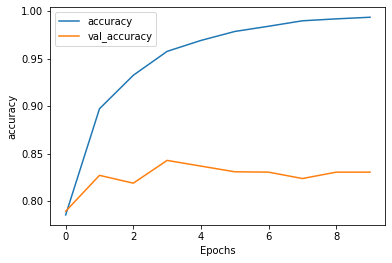

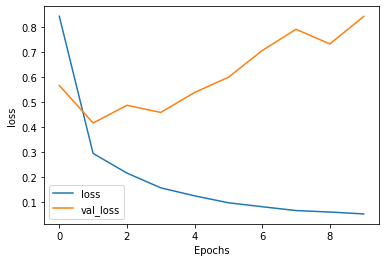

In [59]:
import matplotlib.pyplot as plt


def plot_history(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_history(history, 'accuracy')
plot_history(history, 'loss')
plt.show()

In [60]:
# Model Definition with BiRNN (GRU)
# with L2 Ridge Regularization
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               6500      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 176,601
Trainable params: 176,401
Non-trainable params: 200
______________________________________________

In [61]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 10s 17ms/step - loss: 0.6873 - accuracy: 0.6863 - val_loss: 0.6251 - val_accuracy: 0.6061
Epoch 2/10
376/376 [==============================] - 6s 15ms/step - loss: 0.2650 - accuracy: 0.9045 - val_loss: 0.5875 - val_accuracy: 0.7529
Epoch 3/10
376/376 [==============================] - 6s 15ms/step - loss: 0.1609 - accuracy: 0.9440 - val_loss: 0.8920 - val_accuracy: 0.7054
Epoch 4/10
376/376 [==============================] - 6s 15ms/step - loss: 0.1141 - accuracy: 0.9640 - val_loss: 0.4948 - val_accuracy: 0.8293
Epoch 5/10
376/376 [==============================] - 6s 15ms/step - loss: 0.0838 - accuracy: 0.9748 - val_loss: 0.9714 - val_accuracy: 0.7462
Epoch 6/10
376/376 [==============================] - 6s 15ms/step - loss: 0.0638 - accuracy: 0.9813 - val_loss: 0.6687 - val_accuracy: 0.8270
Epoch 7/10
376/376 [==============================] - 6s 15ms/step - loss: 0.0540 - accuracy: 0.9839 - val_loss: 0.7393 - val_accuracy: 0.824

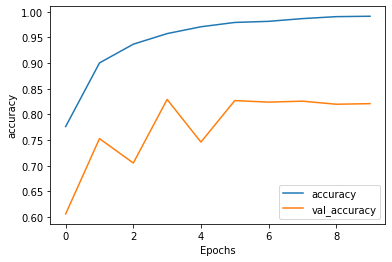

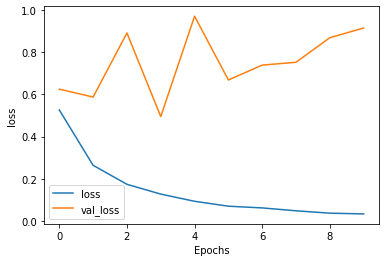

In [62]:
plot_history(history, 'accuracy')
plot_history(history, 'loss')
plt.show()

In [63]:
#RNN With LSTM
# Model Definition with BiRNN (LSTM)
# with L1 Lasso Regularization, for feature selection
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               6500      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 179,545
Trainable params: 179,345
Non-trainable params: 200
______________________________________________

In [64]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 10s 17ms/step - loss: 1.3701 - accuracy: 0.7294 - val_loss: 0.5437 - val_accuracy: 0.8461
Epoch 2/10
376/376 [==============================] - 6s 15ms/step - loss: 0.2823 - accuracy: 0.9063 - val_loss: 0.3853 - val_accuracy: 0.8458
Epoch 3/10
376/376 [==============================] - 6s 15ms/step - loss: 0.1974 - accuracy: 0.9428 - val_loss: 0.4495 - val_accuracy: 0.8360
Epoch 4/10
376/376 [==============================] - 6s 15ms/step - loss: 0.1479 - accuracy: 0.9614 - val_loss: 0.4966 - val_accuracy: 0.8413
Epoch 5/10
376/376 [==============================] - 6s 15ms/step - loss: 0.1090 - accuracy: 0.9746 - val_loss: 0.5734 - val_accuracy: 0.8349
Epoch 6/10
376/376 [==============================] - 6s 15ms/step - loss: 0.0867 - accuracy: 0.9832 - val_loss: 0.6324 - val_accuracy: 0.8338
Epoch 7/10
376/376 [==============================] - 6s 15ms/step - loss: 0.0762 - accuracy: 0.9869 - val_loss: 0.6965 - val_accuracy: 0.837

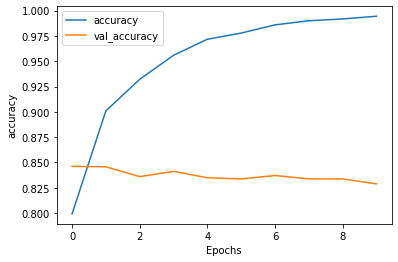

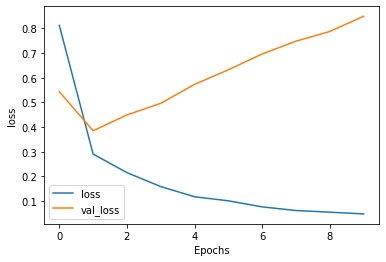

In [65]:
plot_history(history, 'accuracy')
plot_history(history, 'loss')
plt.show()

In [66]:
# Model Definition with BiRNN (LSTM)
# with L2 Ridge Regularization
# Dropout, for robustness of recurrent neural networks
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.003), activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               6500      
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 179,545
Trainable params: 179,345
Non-trainable params: 200
______________________________________________

In [67]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 11s 17ms/step - loss: 0.6336 - accuracy: 0.7271 - val_loss: 0.5164 - val_accuracy: 0.8495
Epoch 2/10
376/376 [==============================] - 6s 15ms/step - loss: 0.2375 - accuracy: 0.9102 - val_loss: 0.3668 - val_accuracy: 0.8319
Epoch 3/10
376/376 [==============================] - 6s 15ms/step - loss: 0.1494 - accuracy: 0.9494 - val_loss: 0.4913 - val_accuracy: 0.8289
Epoch 4/10
376/376 [==============================] - 6s 15ms/step - loss: 0.1033 - accuracy: 0.9663 - val_loss: 0.5210 - val_accuracy: 0.8401
Epoch 5/10
376/376 [==============================] - 6s 15ms/step - loss: 0.0769 - accuracy: 0.9762 - val_loss: 1.0893 - val_accuracy: 0.7525
Epoch 6/10
376/376 [==============================] - 6s 15ms/step - loss: 0.0592 - accuracy: 0.9851 - val_loss: 0.6876 - val_accuracy: 0.8289
Epoch 7/10
376/376 [==============================] - 6s 15ms/step - loss: 0.0423 - accuracy: 0.9896 - val_loss: 0.7313 - val_accuracy: 0.832

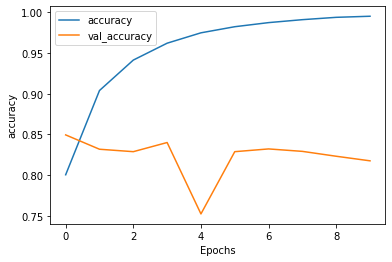

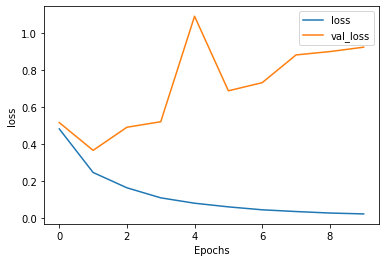

In [68]:
plot_history(history, 'accuracy')
plot_history(history, 'loss')
plt.show()

In [69]:
# Model Definition with CNN (Conv1D)
# with L1 Lasso Regularization, for feature selection
# Dropout, for robustness
# Batch Normalization, to stabilize and perhaps accelerate the learning process

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l1(0.003), activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               12900     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [70]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, batch_size=64, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
376/376 [==============================] - 4s 8ms/step - loss: 1.8119 - accuracy: 0.6966 - val_loss: 0.5921 - val_accuracy: 0.8282
Epoch 2/10
376/376 [==============================] - 3s 7ms/step - loss: 0.3350 - accuracy: 0.8917 - val_loss: 1.4721 - val_accuracy: 0.6039
Epoch 3/10
376/376 [==============================] - 3s 7ms/step - loss: 0.2610 - accuracy: 0.9250 - val_loss: 3.5662 - val_accuracy: 0.4380
Epoch 4/10
376/376 [==============================] - 3s 7ms/step - loss: 0.2188 - accuracy: 0.9386 - val_loss: 0.7883 - val_accuracy: 0.7346
Epoch 5/10
376/376 [==============================] - 3s 7ms/step - loss: 0.1945 - accuracy: 0.9461 - val_loss: 1.0676 - val_accuracy: 0.6769
Epoch 6/10
376/376 [==============================] - 3s 7ms/step - loss: 0.1851 - accuracy: 0.9487 - val_loss: 0.5276 - val_accuracy: 0.8210
Epoch 7/10
376/376 [==============================] - 3s 7ms/step - loss: 0.1714 - accuracy: 0.9540 - val_loss: 2.4759 - val_accuracy: 0.6256
Epoch 

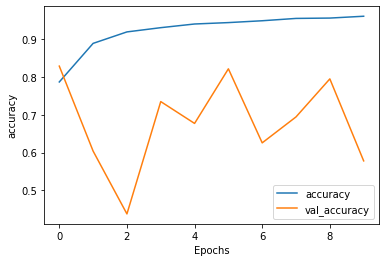

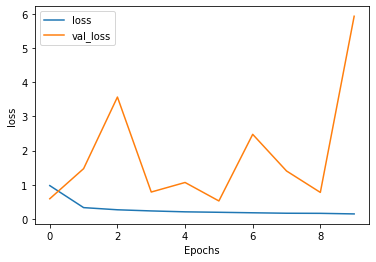

In [71]:
plot_history(history, 'accuracy')
plot_history(history, 'loss')
plt.show()